In [133]:
import yaml
import os, fnmatch, re
import matplotlib.pyplot as plt
import numpy as np 

In [134]:
def data_extraction(calico, hostnetwork):
    calico_vals = []
    hostnetwork_vals = []
    with open(calico, 'r') as calico_results:
        try:
            calico_data = yaml.safe_load(calico_results)
            calico_vals.append(int(calico_data['data']['pod2pod']['tcp']['bandwidth']))
            calico_vals.append(int(calico_data['data']['pod2pod']['udp']['bandwidth']))
            calico_vals.append(int(calico_data['data']['pod2svc']['tcp']['bandwidth']))
            calico_vals.append(int(calico_data['data']['pod2svc']['udp']['bandwidth']))
        except yaml.YAMLError as calico_yerr:
            print(calico_yerr)
            print("Could not open the calico network file")
    with open(hostnetwork, 'r') as hostnetwork_results:
        try: 
            hostnetwork_data = yaml.safe_load(hostnetwork_results)
            hostnetwork_vals.append(int(hostnetwork_data['data']['pod2pod']['tcp']['bandwidth']))
            hostnetwork_vals.append(int(hostnetwork_data['data']['pod2pod']['udp']['bandwidth']))
            hostnetwork_vals.append(int(hostnetwork_data['data']['pod2svc']['tcp']['bandwidth']))
            hostnetwork_vals.append(int(hostnetwork_data['data']['pod2svc']['udp']['bandwidth']))
        except yaml.YAMLError as hostnet_yerr:
            print(hostnet_yerr)
            print("Could not open the hostnetwork file")
    
    return calico_vals, hostnetwork_vals

In [135]:
def networkplotting(calicodata, hostnetworkdata):
    x_ax = [1, 2, 3, 4]
    N = 4
    ind = np.arange(N)
    wid= 0.4
    x_txt = ["pod2pod-tcp", "pod2pod-udp", "pod2svc-tcp", "pod2svc-udp"]
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    rects_calico = ax.bar(x=ind, height=calicodata, width=0.4, color="orange")
    rects_hostnet = ax.bar(x=(ind+wid), height=hostnetworkdata, width=0.4, color="lightblue")
    ax.set_ylabel('Bandwidth [Mbit/s]')
    ax.set_title('Calico and Hostnetwork bandwidth comparison', fontsize='x-large')
    ax.set_xticks(ind + wid/2)
    ax.set_xticklabels(x_txt, fontsize='x-large')

    def autolabel(rects):
    # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.95*height,    
                '%d' % int(height),
                ha='center', va='bottom',
                fontsize='large', fontweight='bold')

    autolabel(rects=rects_calico)
    autolabel(rects=rects_hostnet)
    ax.grid(True, which='major', axis='y')
    ax.legend((rects_calico[0], rects_hostnet[0]), ('Calico', 'Hostnetwork'), 
            loc='lower right', fontsize = 'x-large')

    plt.show()
    

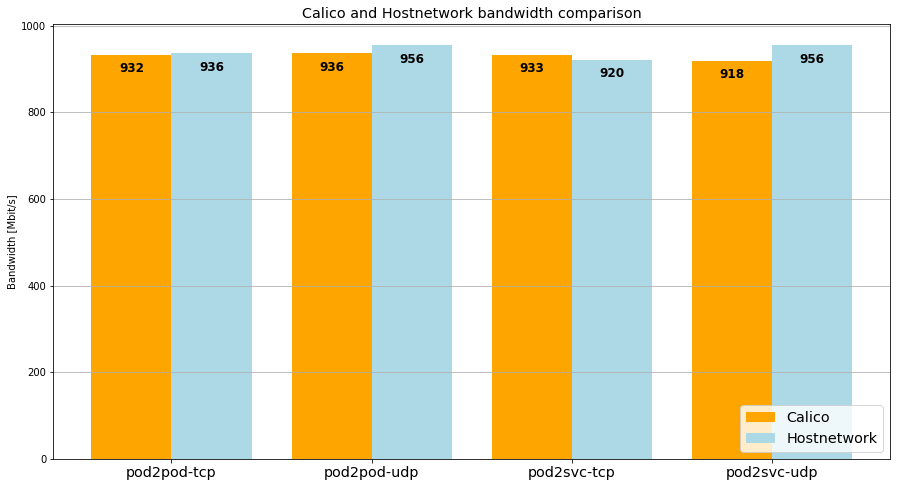

In [136]:
test1 = "tdaqweek1.knbdata.yaml"
test2 = "tdaqweekhn1.knbdata.yaml"

calico_values, hostnetwork_values = data_extraction(test1, test2)

networkplotting(calicodata=calico_values, hostnetworkdata=hostnetwork_values)